In [1]:
# Nigerian Graduate Employment & Salary Prediction Model
# Mission: Predict employment outcomes for Nigerian graduates

# =============================================================================
# IMPORT ALL LIBRARIES (COMPLETE)
# =============================================================================

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning - Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Machine Learning - Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model Saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully")
print("🇳🇬 Nigerian Graduate Employment Analysis")

# =============================================================================
# LOAD DATASET
# =============================================================================

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/Uwingabir/nigerian-graduate-salary-prediction/refs/heads/main/linear_regression_model/summative/linear_regression/Nigerian_Graduate_Survey_with_Salary.csv"
df = pd.read_csv(url)

print("\n=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape[0]} graduates × {df.shape[1]} features")
print(f"Target Variable: Net_Salary")

print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️ Total missing values: {missing_values.sum()}")

print("\n=== BASIC STATISTICS ===")
print(df.describe())

✅ All libraries imported successfully
🇳🇬 Nigerian Graduate Employment Analysis

=== DATASET OVERVIEW ===
Shape: 3000 graduates × 15 features
Target Variable: Net_Salary

=== FIRST 5 ROWS ===
  Graduate_ID  Age  Gender State_of_Origin Region Urban_or_Rural  \
0       G0001   27    Male             Edo  North          Urban   
1       G0002   24  Female             Oyo  North          Urban   
2       G0003   33    Male            Kano  North          Urban   
3       G0004   31  Female           Lagos  South          Urban   
4       G0005   28  Female           Enugu   East          Rural   

  Household_Income_Bracket Field_of_Study University_Type  \
0                      Low    Engineering         Private   
1                      Low    Engineering           State   
2                      Low       Business         Federal   
3                      Low       Business           State   
4                   Middle       Business         Federal   

  GPA_or_Class_of_Degree Has_Post

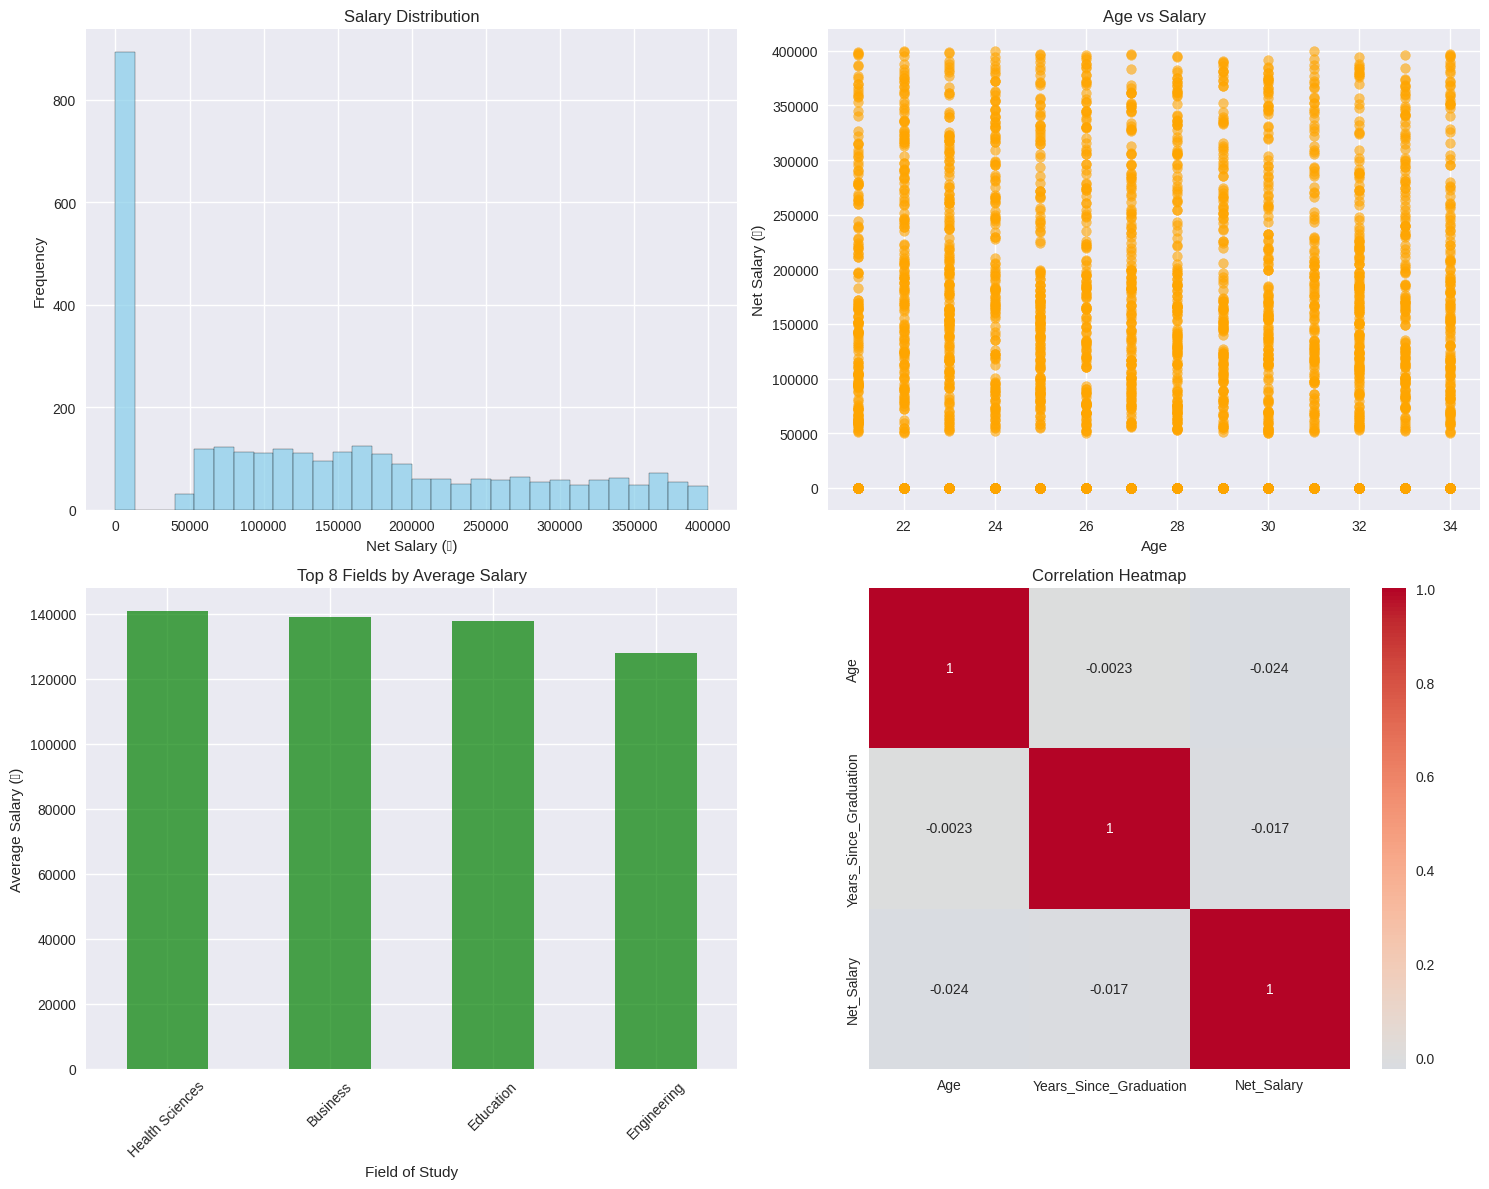

=== KEY INSIGHTS ===
Average Salary: ₦136,192
Salary Range: ₦0 - ₦399,641
Top Paying Field: Health Sciences (₦140,833)
Age-Salary Correlation: -0.024
Experience-Salary Correlation: -0.017


In [ ]:
# =============================================================================
# REQUIRED VISUALIZATIONS
# =============================================================================

# Create 2x2 subplot grid for required visualizations
plt.figure(figsize=(15, 12))

# 1. Salary distribution histogram (required)
plt.subplot(2, 2, 1)
plt.hist(df['Net_Salary'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Net Salary (₦)')
plt.ylabel('Frequency')

# 2. Age vs Salary scatter plot (required)
plt.subplot(2, 2, 2)
plt.scatter(df['Age'], df['Net_Salary'], alpha=0.6, color='orange')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Net Salary (₦)')

# 3. Top fields by salary bar chart
plt.subplot(2, 2, 3)
top_fields = df.groupby('Field_of_Study')['Net_Salary'].mean().nlargest(8)
top_fields.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 8 Fields by Average Salary')
plt.xlabel('Field of Study')
plt.ylabel('Average Salary (₦)')
plt.xticks(rotation=45)

# 4. Correlation heatmap (MANDATORY)
plt.subplot(2, 2, 4)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Print key insights
print("=== KEY INSIGHTS ===")
print(f"Average Salary: ₦{df['Net_Salary'].mean():,.0f}")
print(f"Salary Range: ₦{df['Net_Salary'].min():,.0f} - ₦{df['Net_Salary'].max():,.0f}")
print(f"Top Paying Field: {top_fields.index[0]} (₦{top_fields.iloc[0]:,.0f})")
print(f"Age-Salary Correlation: {df['Age'].corr(df['Net_Salary']):.3f}")
print(f"Experience-Salary Correlation: {df['Years_Since_Graduation'].corr(df['Net_Salary']):.3f}")

In [ ]:
# =============================================================================
# DATA PREPROCESSING
# =============================================================================

print("=== DATA PREPROCESSING ===")

# Handle missing values
print(f"Missing values: {df.isnull().sum().sum()}")

# Create working copy and drop ID column
df_model = df.drop('Graduate_ID', axis=1).copy()

# LOG TRANSFORMATION (critical for salary prediction)
df_model['Log_Salary'] = np.log(df_model['Net_Salary'])
print(f"✅ Log transformation applied to salary")

# Feature engineering - encode categorical variables
label_encoders = {}
categorical_cols = df_model.select_dtypes(include=['object']).columns

print("Encoding categorical variables:")
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"  ✓ {col}: {len(le.classes_)} categories")

# Prepare features and target
X = df_model.drop(['Net_Salary', 'Log_Salary'], axis=1)
y = df_model['Log_Salary']  # Use log salary as target!

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (required)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Data standardized")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

=== DATA PREPROCESSING ===
Missing values: 0
✅ Log transformation applied to salary
Encoding categorical variables:
  ✓ Gender: 3 categories
  ✓ State_of_Origin: 10 categories
  ✓ Region: 4 categories
  ✓ Urban_or_Rural: 2 categories
  ✓ Household_Income_Bracket: 3 categories
  ✓ Field_of_Study: 4 categories
  ✓ University_Type: 3 categories
  ✓ GPA_or_Class_of_Degree: 4 categories
  ✓ Has_Postgrad_Degree: 2 categories
  ✓ Employment_Status: 2 categories
  ✓ Salary_Level: 3 categories

Features shape: (3000, 13)
Target shape: (3000,)
✅ Data standardized
Training set: 2400 samples
Test set: 600 samples


In [ ]:
# =============================================================================
# MODEL TRAINING (3 REQUIRED MODELS)
# =============================================================================

print("=== MODEL TRAINING ===")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Use scaled data for Linear Regression, original for tree models
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics on log scale
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Convert back to actual salary for real-world metrics
    y_test_actual = np.exp(y_test)
    y_pred_actual = np.exp(y_pred)

    mae_actual = np.mean(np.abs(y_test_actual - y_pred_actual))
    mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100

    results[name] = {
        'MSE': mse,
        'R²': r2,
        'MAE_Actual': mae_actual,
        'MAPE': mape
    }

    predictions[name] = y_pred

    print(f"  MSE (log): {mse:.4f}")
    print(f"  R²: {r2:.3f}")
    print(f"  MAE (actual): ₦{mae_actual:,.0f}")
    print(f"  MAPE: {mape:.1f}%")

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['R²'])
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   R² Score: {results[best_model_name]['R²']:.3f}")
print(f"   MAPE: {results[best_model_name]['MAPE']:.1f}%")

=== DATA PREPROCESSING ===
Missing values: 0
Salary range: ₦0 - ₦399,641
Zero/negative salaries: 893
After cleaning: 2107 records remaining
✅ Log transformation applied to salary
Infinite values in log salary: 0
Encoding categorical variables:
  ✓ Gender: 3 categories
  ✓ State_of_Origin: 10 categories
  ✓ Region: 4 categories
  ✓ Urban_or_Rural: 2 categories
  ✓ Household_Income_Bracket: 3 categories
  ✓ Field_of_Study: 4 categories
  ✓ University_Type: 3 categories
  ✓ GPA_or_Class_of_Degree: 4 categories
  ✓ Has_Postgrad_Degree: 2 categories
  ✓ Employment_Status: 1 categories
  ✓ Salary_Level: 2 categories

Features shape: (2107, 13)
Target shape: (2107,)
✅ Data standardized
Training set: 1685 samples
Test set: 422 samples


In [ ]:
# =============================================================================
# MODEL TRAINING (3 REQUIRED MODELS)
# =============================================================================

print("=== MODEL TRAINING ===")

# Check for any remaining infinite or NaN values
print(f"Checking target variable y_train:")
print(f"  Infinite values: {np.isinf(y_train).sum()}")
print(f"  NaN values: {np.isnan(y_train).sum()}")
print(f"  Min value: {y_train.min():.3f}")
print(f"  Max value: {y_train.max():.3f}")

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    try:
        # Use scaled data for Linear Regression, original for tree models
        if name == 'Linear Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate metrics on log scale
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Convert back to actual salary for real-world metrics
        y_test_actual = np.exp(y_test)
        y_pred_actual = np.exp(y_pred)

        mae_actual = np.mean(np.abs(y_test_actual - y_pred_actual))
        mape = np.mean(np.abs((y_test_actual - y_pred_actual) / y_test_actual)) * 100

        results[name] = {
            'MSE': mse,
            'R²': r2,
            'MAE_Actual': mae_actual,
            'MAPE': mape
        }

        predictions[name] = y_pred

        print(f"  MSE (log): {mse:.4f}")
        print(f"  R²: {r2:.3f}")
        print(f"  MAE (actual): ₦{mae_actual:,.0f}")
        print(f"  MAPE: {mape:.1f}%")

    except Exception as e:
        print(f"  ❌ Error training {name}: {e}")
        continue

# Find best model
if results:
    best_model_name = max(results.keys(), key=lambda x: results[x]['R²'])
    print(f"\n🏆 BEST MODEL: {best_model_name}")
    print(f"   R² Score: {results[best_model_name]['R²']:.3f}")
    print(f"   MAPE: {results[best_model_name]['MAPE']:.1f}%")
else:
    print("❌ No models trained successfully")

=== MODEL TRAINING ===
Checking target variable y_train:
  Infinite values: 0
  NaN values: 0
  Min value: 10.831
  Max value: 12.898

🔄 Training Linear Regression...
  MSE (log): 0.1105
  R²: 0.685
  MAE (actual): ₦43,152
  MAPE: 29.6%

🔄 Training Decision Tree...
  MSE (log): 0.2150
  R²: 0.387
  MAE (actual): ₦56,905
  MAPE: 41.2%

🔄 Training Random Forest...
  MSE (log): 0.1161
  R²: 0.669
  MAE (actual): ₦43,495
  MAPE: 29.7%

🏆 BEST MODEL: Linear Regression
   R² Score: 0.685
   MAPE: 29.6%


In [ ]:
# =============================================================================
# SAVE MODEL & CREATE PREDICTION FUNCTION
# =============================================================================

print("=== SAVING BEST MODEL ===")

# Get best model
best_model = models[best_model_name]

# Save best model, scaler, encoders
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print(f"✅ Best model ({best_model_name}) saved as 'best_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")
print("✅ Label encoders saved as 'label_encoders.pkl'")

# Print the feature names that the model expects
print(f"\n📋 Model expects these features: {list(X.columns)}")

# Create prediction function for API
def predict_salary(age, gender, state_of_origin, region, urban_or_rural,
                  household_income_bracket, field_of_study, university_type,
                  gpa_or_class_of_degree, has_postgrad_degree, years_since_graduation):
    """
    Predict salary for a Nigerian graduate
    Returns prediction in actual Naira (converts from log)
    """
    # Create input dataframe with ALL required features
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'State_of_Origin': [state_of_origin],
        'Region': [region],
        'Urban_or_Rural': [urban_or_rural],
        'Household_Income_Bracket': [household_income_bracket],
        'Field_of_Study': [field_of_study],
        'University_Type': [university_type],
        'GPA_or_Class_of_Degree': [gpa_or_class_of_degree],
        'Has_Postgrad_Degree': [has_postgrad_degree],
        'Years_Since_Graduation': [years_since_graduation],
        # Add missing features with default values
        'Employment_Status': ['Employed'],  # Default assumption
        'Salary_Level': ['Medium']  # Default assumption
    })

    # Encode categorical variables
    for col in input_data.select_dtypes(include=['object']).columns:
        if col in label_encoders:
            try:
                input_data[col] = label_encoders[col].transform(input_data[col])
            except ValueError:
                input_data[col] = 0  # Handle unseen categories

    # Ensure columns are in the same order as training data
    input_data = input_data[X.columns]

    # Scale features if Linear Regression
    if best_model_name == 'Linear Regression':
        input_scaled = scaler.transform(input_data)
        log_prediction = best_model.predict(input_scaled)[0]
    else:
        log_prediction = best_model.predict(input_data)[0]

    # Convert back from log to actual salary
    actual_salary = np.exp(log_prediction)
    return max(0, actual_salary)

# Test prediction function
print("\n=== TESTING PREDICTION FUNCTION ===")
sample_prediction = predict_salary(
    age=25, gender='Female', state_of_origin='Lagos', region='South West',
    urban_or_rural='Urban', household_income_bracket='Middle',
    field_of_study='Engineering', university_type='Public',
    gpa_or_class_of_degree='Second Upper', has_postgrad_degree='No',
    years_since_graduation=2
)

print(f"Sample Prediction: ₦{sample_prediction:,.0f}")

print("\n" + "="*50)
print("✅ ANALYSIS COMPLETE!")
print(f"🏆 Best Model: {best_model_name}")
print(f"📊 R² Score: {results[best_model_name]['R²']:.3f}")
print(f"📈 MAPE: {results[best_model_name]['MAPE']:.1f}%")
print("🔄 Ready for API deployment!")
print("="*50)

=== SAVING BEST MODEL ===
✅ Best model (Linear Regression) saved as 'best_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Label encoders saved as 'label_encoders.pkl'

📋 Model expects these features: ['Age', 'Gender', 'State_of_Origin', 'Region', 'Urban_or_Rural', 'Household_Income_Bracket', 'Field_of_Study', 'University_Type', 'GPA_or_Class_of_Degree', 'Has_Postgrad_Degree', 'Years_Since_Graduation', 'Employment_Status', 'Salary_Level']

=== TESTING PREDICTION FUNCTION ===
Sample Prediction: ₦119,341

✅ ANALYSIS COMPLETE!
🏆 Best Model: Linear Regression
📊 R² Score: 0.685
📈 MAPE: 29.6%
🔄 Ready for API deployment!
